In [196]:
# import all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Performance**




- AGE_CATEGORY
Age group of the reader (e.g., young_adult).

- GENDER
Gender of the participant (male, female, other).

- MAJOR
Academic major or role of the reader (e.g., student).

- MINUTES_READING
Total duration (in minutes) spent actively reading during the session.

- MINUTES_BREAK
Total break time (in minutes) taken during reading.

- FOCUS_LEVEL Level of focus during the reading session. Higher values indicate stronger concentration.

- PAGES
Number of pages read during the session.

- CONTENT_LEVEL_ENUM
Difficulty level of the reading material.

- READING_GENRE
Genre of the reading material (e.g., academic, language, self-development).

- SOUND_VOLUME
Environmental sound intensity during reading, ranging from silent to extremely loud.




In [197]:
# uploaded file
from google.colab import files
uploaded = files.upload()

Saving reading.parquet to reading (3).parquet


# **EDA STEPS**

In [198]:
df = pd.read_parquet('reading.parquet')
df.head()

,AGE_CATEGORY,GENDER,MAJOR,MINUTES_READING,MINUTES_BREAK,FOCUS_LEVEL,PAGES,CONTENT_LEVEL_ENUM,READING_GENRE,SOUND_VOLUME,...,LOCATION,WEATHER,MOOD,HUNGER,AROUSAL,MENTAL_IN_BREAK,COMPREHENSION_DEPTH,LINKING_TO_PREVIOUS_KNOWLEDGE,MENTAL_FATIGUE,INTERESTING_LEVEL
0,young_adult,male,student,80,10,2,8.0,2,technical_&_vocational,silent,...,home,clear,slightly_bad,slightly_hungry,slightly_low,neutral,good,some_connections,slightly_fatigued,neutral
1,young_adult,male,student,80,10,2,8.0,3,technical_&_vocational,silent,...,home,clear,slightly_bad,slightly_hungry,slightly_low,neutral,basic,some_connections,fresh,somewhat_interesting
2,young_adult,male,student,80,20,1,14.0,2,technical_&_vocational,silent,...,home,cloudy,slightly_bad,full,neutral,chaotic,basic,forced_linking,slightly_fatigued,neutral
3,young_adult,male,student,48,4,3,3.0,3,technical_&_vocational,silent,...,home,clear,neutral,full,high,chaotic,basic,forced_linking,normal,boring
4,young_adult,male,student,95,22,3,7.0,3,technical_&_vocational,silent,...,home,clear,neutral,satisfied,slightly_high,very_chaotic,basic,forced_linking,slightly_fatigued,extremely_boring


- AGE : Young_adult
- Gender: Male
- Major Student

-> THESE VALUE IS UNIQUE

In [199]:
df['MOOD'].value_counts()


,count
MOOD,
good,44
neutral,36
slightly_good,28
slightly_bad,5
very_good,4
bad,1


In [200]:
df['AROUSAL'].value_counts()

,count
AROUSAL,
high,60
slightly_low,15
neutral,14
very_high,14
low,9
slightly_high,6


In [201]:
single_value_cols = [
    col for col in df.select_dtypes(include='object').columns
    if df[col].nunique() == 1
]

single_value_cols
# These columns have unique value

['AGE_CATEGORY', 'GENDER', 'MAJOR']

Check for NAN values (whether values are missing)

In [202]:
df.isnull().sum()

,0
AGE_CATEGORY,0
GENDER,0
MAJOR,0
MINUTES_READING,0
MINUTES_BREAK,0
FOCUS_LEVEL,0
PAGES,0
CONTENT_LEVEL_ENUM,0
READING_GENRE,0
SOUND_VOLUME,0


In [203]:
#duplicated
df.duplicated().sum()

np.int64(0)

In [204]:
df.describe() #with number

,MINUTES_READING,MINUTES_BREAK,FOCUS_LEVEL,PAGES,CONTENT_LEVEL_ENUM
count,118.000000,118.000000,118.000000,118.000000,118.000000
mean,77.779661,10.466102,2.644068,10.741525,2.271186
std,50.450303,19.374264,0.620524,10.065328,0.833703
min,12.000000,0.000000,1.000000,1.000000,1.000000
25%,48.500000,0.000000,2.000000,4.000000,2.000000
50%,70.500000,4.500000,3.000000,8.000000,3.000000
75%,95.000000,15.000000,3.000000,14.000000,3.000000
max,456.000000,165.000000,3.000000,51.000000,3.000000


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AGE_CATEGORY                   118 non-null    object 
 1   GENDER                         118 non-null    object 
 2   MAJOR                          118 non-null    object 
 3   MINUTES_READING                118 non-null    int64  
 4   MINUTES_BREAK                  118 non-null    int64  
 5   FOCUS_LEVEL                    118 non-null    int64  
 6   PAGES                          118 non-null    float64
 7   CONTENT_LEVEL_ENUM             118 non-null    int64  
 8   READING_GENRE                  118 non-null    object 
 9   SOUND_VOLUME                   118 non-null    object 
 10  DEVICE                         118 non-null    object 
 11  LOCATION                       118 non-null    object 
 12  WEATHER                        118 non-null    obj

# COUNT VALUE IN EACH COLUMNS

In [206]:
# 1. Distribution cho cột numeric
print("===== NUMERIC COLUMNS =====")
display(df.select_dtypes(include=['int64', 'float64']).describe())

===== NUMERIC COLUMNS =====


,MINUTES_READING,MINUTES_BREAK,FOCUS_LEVEL,PAGES,CONTENT_LEVEL_ENUM
count,118.000000,118.000000,118.000000,118.000000,118.000000
mean,77.779661,10.466102,2.644068,10.741525,2.271186
std,50.450303,19.374264,0.620524,10.065328,0.833703
min,12.000000,0.000000,1.000000,1.000000,1.000000
25%,48.500000,0.000000,2.000000,4.000000,2.000000
50%,70.500000,4.500000,3.000000,8.000000,3.000000
75%,95.000000,15.000000,3.000000,14.000000,3.000000
max,456.000000,165.000000,3.000000,51.000000,3.000000


In [207]:
print("\n===== CATEGORICAL (NUMBER) COLUMNS =====")
for col in df.select_dtypes(include='int').columns:
    print(f"\n--- {col} ---")
    display(df[col].value_counts())
#number of values in each column


===== CATEGORICAL (NUMBER) COLUMNS =====

--- MINUTES_READING ---


,count
MINUTES_READING,
60,7
99,5
80,3
110,3
91,3
...,...
456,1
79,1
114,1



--- MINUTES_BREAK ---


,count
MINUTES_BREAK,
0,44
15,8
10,8
3,7
5,6
2,5
6,4
30,4
20,3



--- FOCUS_LEVEL ---


,count
FOCUS_LEVEL,
3,85
2,24
1,9



--- CONTENT_LEVEL_ENUM ---


,count
CONTENT_LEVEL_ENUM,
3,61
1,29
2,28


In [208]:
# Distribution cho cột object
print("\n===== CATEGORICAL (OBJECT) COLUMNS =====")
for col in df.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    display(df[col].value_counts())

#DEVICE	, AGE_CATEGORY, GENDER, MAJOR, READING GERNE, LOCATION x ORDINAL


===== CATEGORICAL (OBJECT) COLUMNS =====

--- AGE_CATEGORY ---


,count
AGE_CATEGORY,
young_adult,118



--- GENDER ---


,count
GENDER,
male,118



--- MAJOR ---


,count
MAJOR,
student,118



--- READING_GENRE ---


,count
READING_GENRE,
academic,82
technical_&_vocational,24
self-development,9
language,3



--- SOUND_VOLUME ---


,count
SOUND_VOLUME,
silent,58
very_quiet,14
quiet,12
moderate,11
loud,9
slightly_quiet,9
almost_moderate,4
very_loud,1



--- DEVICE ---


,count
DEVICE,
laptop,84
book,33
smartphone,1



--- LOCATION ---


,count
LOCATION,
home,101
library,15
outdoor,1
office,1



--- WEATHER ---


,count
WEATHER,
clear,43
cloudy,43
sunny,20
rainy,9
stormy,3



--- MOOD ---


,count
MOOD,
good,44
neutral,36
slightly_good,28
slightly_bad,5
very_good,4
bad,1



--- HUNGER ---


,count
HUNGER,
satisfied,33
full,27
slightly_full,17
slightly_hungry,13
overstuffed,8
very_full,7
hungry,6
very_hungry,3
starving,2



--- AROUSAL ---


,count
AROUSAL,
high,60
slightly_low,15
neutral,14
very_high,14
low,9
slightly_high,6



--- MENTAL_IN_BREAK ---


,count
MENTAL_IN_BREAK,
none_break,42
neutral,20
calm,18
slightly_chaotic,13
slightly_calm,12
chaotic,9
very_chaotic,3
very_calm,1



--- COMPREHENSION_DEPTH ---


,count
COMPREHENSION_DEPTH,
good,36
strong,30
basic,15
moderate,15
minimal,10
mastery,8
no_understanding,4



--- LINKING_TO_PREVIOUS_KNOWLEDGE ---


,count
LINKING_TO_PREVIOUS_KNOWLEDGE,
some_connections,56
natural_linking,33
forced_linking,16
no_connection_made,7
integrated_into_framework,6



--- MENTAL_FATIGUE ---


,count
MENTAL_FATIGUE,
normal,39
fresh,31
slightly_fatigued,14
very_fresh,14
extremely_fresh,8
fatigued,8
very_fatigued,4



--- INTERESTING_LEVEL ---


,count
INTERESTING_LEVEL,
interesting,32
somewhat_interesting,29
neutral,27
extremely_interesting,17
boring,8
very_boring,3
extremely_boring,2


#CHECK FOR SKEW

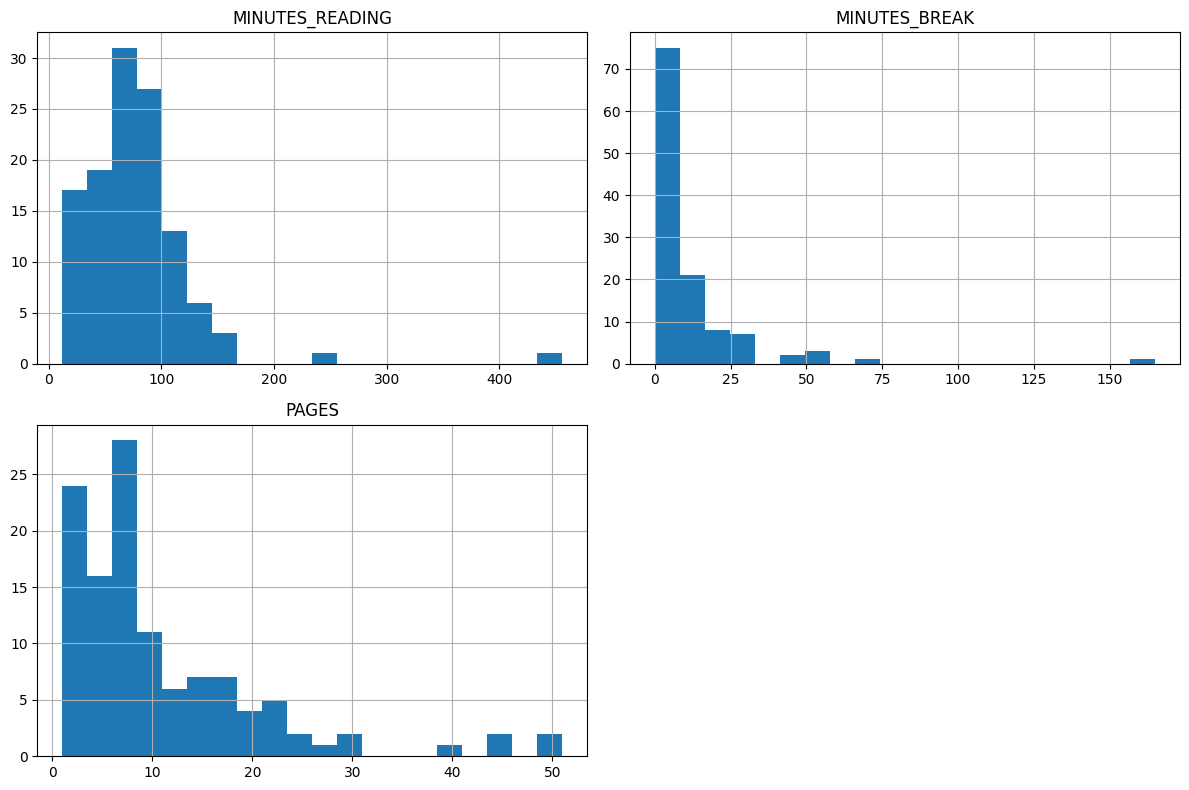

In [209]:
import matplotlib.pyplot as plt

df[['MINUTES_READING', 'MINUTES_BREAK', 'PAGES']].hist(
    bins=20,
    figsize=(12, 8)
)

plt.tight_layout()
plt.show()

The distributions of MINUTES_READING, MINUTES_BREAK, and PAGES are all right-skewed with noticeable outliers, indicating non-normal reading behavior. Most reading sessions are moderate in duration and page count, while a small number of sessions are unusually long. This justifies the use of log transformations and robust modeling approaches to reduce the influence of extreme values and improve model stability.

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Giả sử df là dataframe của bạn
# Chọn các cột dạng số (loại bỏ các cột định danh/categorical như ID nếu có)
# Dựa trên hình ảnh của bạn, tôi liệt kê các cột này:

cols_to_check = ['MINUTES_READING', 'MINUTES_BREAK', 'PAGES']

# 1. Tính độ lệch (Skewness)
# Skewness > 1: Lệch phải nặng -> NÊN LOG
# Skewness < -1: Lệch trái nặng
# Skewness từ -0.5 đến 0.5: Khá đối xứng -> KHÔNG CẦN LOG

print("--- ĐỘ LỆCH (SKEWNESS) ---")
skewness = df[cols_to_check].skew().sort_values(ascending=False)
print(skewness)

# 2. Kiểm tra giá trị Min (để xem có số 0 không)
print("\n--- GIÁ TRỊ NHỎ NHẤT (MIN) ---")
print(df[cols_to_check].min())

--- ĐỘ LỆCH (SKEWNESS) ---
MINUTES_BREAK      4.993570
MINUTES_READING    3.946996
PAGES              2.029648
dtype: float64

--- GIÁ TRỊ NHỎ NHẤT (MIN) ---
MINUTES_READING    12.0
MINUTES_BREAK       0.0
PAGES               1.0
dtype: float64


All three variables exhibit strong right skewness, indicating highly non-normal distributions. MINUTES_BREAK and MINUTES_READING are extremely right-skewed, while PAGES is moderately right-skewed, supporting the need for transformation. The presence of zero values in MINUTES_BREAK implies that a standard log transform is not directly applicable; instead, a shifted log transformation (e.g., log(x + 1)) is required. Overall, applying log-based transformations is justified to reduce skewness and improve model robustness.

#**LOG GIÁ TRỊ**

In [211]:
df['LOG_MINUTES_READING'] = np.log1p(df['MINUTES_READING'])
df['LOG_MINUTES_BREAK']   = np.log1p(df['MINUTES_BREAK'])
df['LOG_PAGES']           = np.log1p(df['PAGES'])
#log values (which are skewed)

In [212]:

# DROP ORIGINAL (NON-LOG) COLUMNS

log_original_cols_to_drop = [
    "MINUTES_READING",
    "MINUTES_BREAK",
    "PAGES",
]

df.drop(columns=log_original_cols_to_drop, inplace=True)
print(df.columns)
print(df.dtypes)



Index(['AGE_CATEGORY', 'GENDER', 'MAJOR', 'FOCUS_LEVEL', 'CONTENT_LEVEL_ENUM',
       'READING_GENRE', 'SOUND_VOLUME', 'DEVICE', 'LOCATION', 'WEATHER',
       'MOOD', 'HUNGER', 'AROUSAL', 'MENTAL_IN_BREAK', 'COMPREHENSION_DEPTH',
       'LINKING_TO_PREVIOUS_KNOWLEDGE', 'MENTAL_FATIGUE', 'INTERESTING_LEVEL',
       'LOG_MINUTES_READING', 'LOG_MINUTES_BREAK', 'LOG_PAGES'],
      dtype='object')
AGE_CATEGORY                      object
GENDER                            object
MAJOR                             object
FOCUS_LEVEL                        int64
CONTENT_LEVEL_ENUM                 int64
READING_GENRE                     object
SOUND_VOLUME                      object
DEVICE                            object
LOCATION                          object
WEATHER                           object
MOOD                              object
HUNGER                            object
AROUSAL                           object
MENTAL_IN_BREAK                   object
COMPREHENSION_DEPTH           

--- COMPARE(SKEWNESS) ---
Target: The skewness value after logging should be closer to 0 (ideally between -0.5 and 0.5).)
Displaying previously computed skewness comparison (from 'df_skew_compare' in kernel state):
Error: 'df_skew_compare' was not found in the kernel state or is not a DataFrame.
Cannot display skewness comparison before log transformation.

--- Skewness of Log-Transformed Columns (Current DataFrame) ---
Variable: LOG_MINUTES_READING, Skew (After): -0.25
Variable: LOG_MINUTES_BREAK, Skew (After): 0.22
Variable: LOG_PAGES, Skew (After): 0.06

--- BASIC STATISTICS OF LOG DATA ---
       LOG_MINUTES_READING  LOG_MINUTES_BREAK   LOG_PAGES
count           118.000000         118.000000  118.000000
mean              4.217540           1.539362    2.162240
std               0.552213           1.379240    0.781499
min               2.564949           0.000000    0.693147
25%               3.901822           0.000000    1.609438
50%               4.269673           1.700599    2.

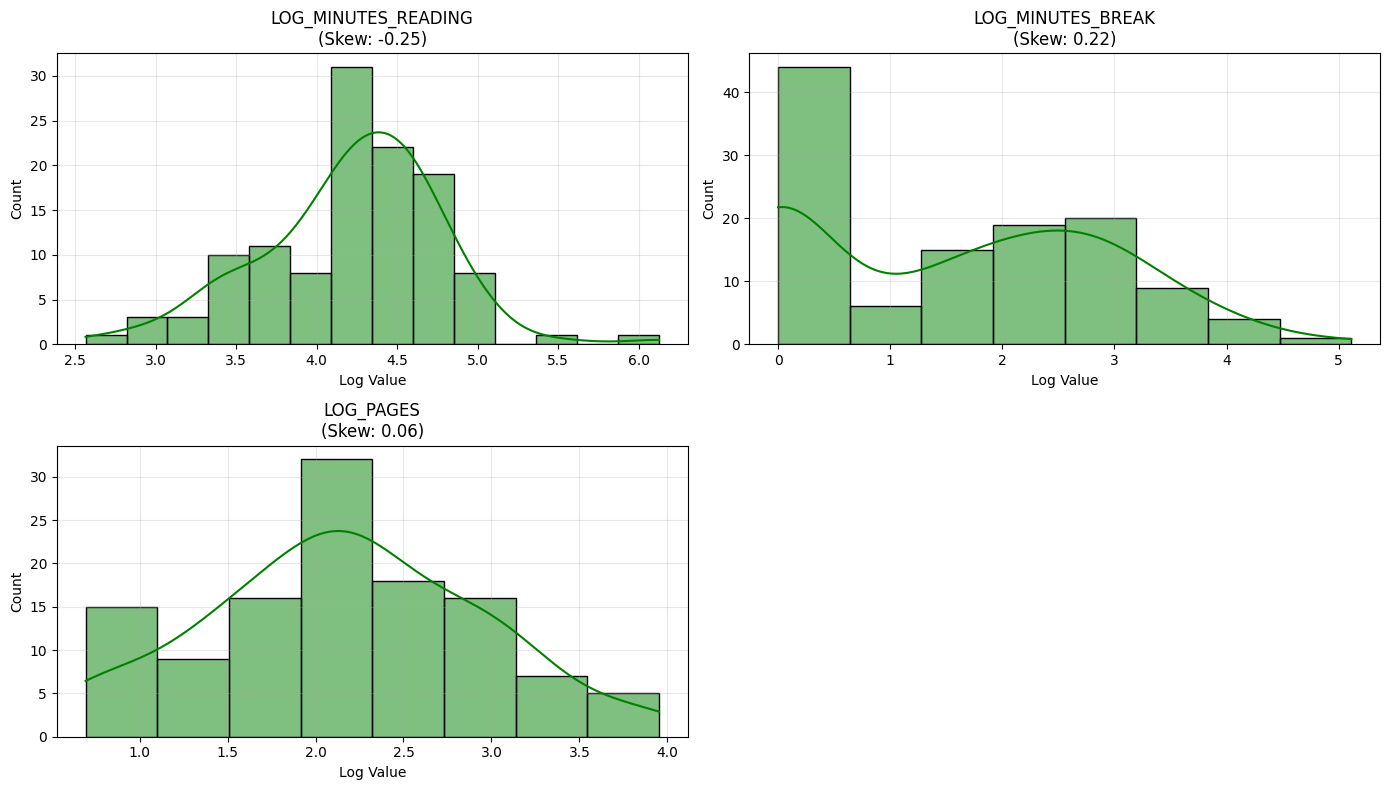

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Note: Original columns MINUTES_READING, MINUTES_BREAK, PAGES were dropped.
# The skewness comparison will refer to a previously calculated df_skew_compare
# if the original columns are no longer present.
vars_to_check = [
    ('MINUTES_READING', 'LOG_MINUTES_READING'),
    ('MINUTES_BREAK',   'LOG_MINUTES_BREAK'),
    ('PAGES',           'LOG_PAGES'),
]

print("--- COMPARE(SKEWNESS) ---")
print("Target: The skewness value after logging should be closer to 0 (ideally between -0.5 and 0.5).)")

# Check if original columns still exist in df
original_cols_exist_in_df = all(col in df.columns for col, _ in vars_to_check)

if original_cols_exist_in_df:
    comparison_data = []
    for original, log_col in vars_to_check:
        skew_before = df[original].skew()
        skew_after = df[log_col].skew()
        comparison_data.append({
            'Variable': original,
            'Skew (Before)': round(skew_before, 2),
            'Skew (After)': round(skew_after, 2),
            'Improved?': abs(skew_after) < abs(skew_before)
        })
    df_skew_compare = pd.DataFrame(comparison_data)
    print(df_skew_compare)
else:
    print("Warning: Original columns ('MINUTES_READING', 'MINUTES_BREAK', 'PAGES') are no longer in the DataFrame `df`.")
    print("Displaying previously computed skewness comparison (from 'df_skew_compare' in kernel state):")
    # Assuming df_skew_compare is available in the kernel state as per the context
    if 'df_skew_compare' in globals() and isinstance(df_skew_compare, pd.DataFrame):
        print(df_skew_compare)
    else:
        print("Error: 'df_skew_compare' was not found in the kernel state or is not a DataFrame.")
        print("Cannot display skewness comparison before log transformation.")
        print("\n--- Skewness of Log-Transformed Columns (Current DataFrame) ---")
        for _, log_col in vars_to_check:
            skew_after = df[log_col].skew()
            print(f"Variable: {log_col}, Skew (After): {round(skew_after, 2)}")


print("\n--- BASIC STATISTICS OF LOG DATA ---")
log_cols = [x[1] for x in vars_to_check]
print(df[log_cols].describe())

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

# Only iterate up to the number of log columns or available axes, whichever is smaller
for i, (_, log_col) in enumerate(vars_to_check):
    if i < len(axes): # Ensure we don't go out of bounds for axes array
        sns.histplot(df[log_col], kde=True, ax=axes[i], color='green')
        axes[i].set_title(f'{log_col}\n(Skew: {df[log_col].skew():.2f})')
        axes[i].set_xlabel('Log Value')
        axes[i].grid(True, alpha=0.3)
    else:
        print(f"Warning: Not enough subplots to display all log-transformed distributions. Skipped {log_col}.")

# Turn off unused subplots if any (e.g., if there are fewer variables than subplots)
for j in range(len(vars_to_check), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

After log transformation, the skewness of all variables is substantially reduced and falls within the desirable range (−0.5 to 0.5). This indicates that the distributions are now close to symmetric. The log-transformed variables exhibit stable central tendency and dispersion, with no extreme skewness remaining. Overall, the transformation objective is achieved, and the log features are suitable for downstream modeling.

#**CONVERT VALUES IN THE COLUMNS => ORDINAL DATA**

In [214]:


# =========================
# 1. ORDINAL NUMERIC (GIỮ NGUYÊN)
# =========================
ordinal_numeric_cols = [
    "FOCUS_LEVEL",
    "CONTENT_LEVEL_ENUM"
]

# =========================
# 2. ORDINAL MAPPINGS
# =========================

sound_volume_map = {
    "silent": 1,
    "very_quiet": 2,
    "slightly_quiet": 3,
    "quiet": 4,
    "almost_moderate": 5,
    "moderate": 6,
    "loud": 7,
    "very_loud": 8
}

weather_map = {
    "clear": 1,
    "sunny": 2,
    "cloudy": 3,
    "rainy": 4,
    "stormy": 5
}

mood_map = {
    "bad": 1,
    "slightly_bad": 2,
    "neutral": 3,
    "slightly_good": 4,
    "good": 5,
    "very_good": 6
}

hunger_map = {
    "starving": 1,
    "extreme_hungry": 2,
    "very_hungry": 3,
    "hungry": 4,
    "slightly_hungry": 5,
    "satisfied": 6,
    "slightly_full": 7,
    "full": 8,
    "very_full": 9,
    "overstuffed": 10
}

arousal_map = {
    "low": 1,
    "slightly_low": 2,
    "neutral": 3,
    "slightly_high": 4,
    "high": 5,
    "very_high": 6
}

mental_break_map = {
    "very_chaotic": 1,
    "chaotic": 2,
    "slightly_chaotic": 3,
    "neutral": 4,
    "slightly_calm": 5,
    "calm": 6,
    "very_calm": 7,
    "none_break": 8
}

comprehension_map = {
    "no_understanding": 1,
    "minimal": 2,
    "basic": 3,
    "moderate": 4,
    "good": 5,
    "strong": 6,
    "mastery": 7
}

mental_fatigue_map = {
    "extremely_fresh": 1,
    "very_fresh": 2,
    "fresh": 3,
    "normal": 4,
    "slightly_fatigued": 5,
    "fatigued": 6,
    "very_fatigued": 7
}

interesting_map = {
    "extremely_boring": 1,
    "very_boring": 2,
    "boring": 3,
    "neutral": 4,
    "somewhat_interesting": 5,
    "interesting": 6,
    "extremely_interesting": 7
}

linking_map = {
    "no_connection_made": 1,
    "forced_linking": 2,
    "some_connections": 3,
    "natural_linking": 4,
    "integrated_into_framework": 5
}

# =========================
# 3. APPLY MAPPING
# =========================

df["SOUND_VOLUME_ORD"] = df["SOUND_VOLUME"].map(sound_volume_map)
df["WEATHER_ORD"] = df["WEATHER"].map(weather_map)
df["MOOD_ORD"] = df["MOOD"].map(mood_map)
df["HUNGER_ORD"] = df["HUNGER"].map(hunger_map)
df["AROUSAL_ORD"] = df["AROUSAL"].map(arousal_map)
df["MENTAL_IN_BREAK_ORD"] = df["MENTAL_IN_BREAK"].map(mental_break_map)
df["COMPREHENSION_DEPTH_ORD"] = df["COMPREHENSION_DEPTH"].map(comprehension_map)
df["MENTAL_FATIGUE_ORD"] = df["MENTAL_FATIGUE"].map(mental_fatigue_map)
df["INTERESTING_LEVEL_ORD"] = df["INTERESTING_LEVEL"].map(interesting_map)
df["LINKING_TO_PREVIOUS_KNOWLEDGE_ORD"] = df["LINKING_TO_PREVIOUS_KNOWLEDGE"].map(linking_map)

# =========================
# 4. CHECK MISSING AFTER MAPPING
# =========================

ordinal_cols = [c for c in df.columns if c.endswith("_ORD")]
print(df[ordinal_cols].isna().sum())




SOUND_VOLUME_ORD                     0
WEATHER_ORD                          0
MOOD_ORD                             0
HUNGER_ORD                           0
AROUSAL_ORD                          0
MENTAL_IN_BREAK_ORD                  0
COMPREHENSION_DEPTH_ORD              0
MENTAL_FATIGUE_ORD                   0
INTERESTING_LEVEL_ORD                0
LINKING_TO_PREVIOUS_KNOWLEDGE_ORD    0
dtype: int64


**DROP: the not ordinal data**

In [215]:
original_cols_to_drop = [
    "SOUND_VOLUME",
    "WEATHER",
    "MOOD",
    "HUNGER",
    "AROUSAL",
    "MENTAL_IN_BREAK",
    "COMPREHENSION_DEPTH",
    "MENTAL_FATIGUE",
    "INTERESTING_LEVEL",
    "LINKING_TO_PREVIOUS_KNOWLEDGE"
]

df.drop(columns=original_cols_to_drop, inplace=True)

# =========================
# (OPTIONAL) CHECK RESULT
# =========================
print(df.columns)
print(df.dtypes)

Index(['AGE_CATEGORY', 'GENDER', 'MAJOR', 'FOCUS_LEVEL', 'CONTENT_LEVEL_ENUM',
       'READING_GENRE', 'DEVICE', 'LOCATION', 'LOG_MINUTES_READING',
       'LOG_MINUTES_BREAK', 'LOG_PAGES', 'SOUND_VOLUME_ORD', 'WEATHER_ORD',
       'MOOD_ORD', 'HUNGER_ORD', 'AROUSAL_ORD', 'MENTAL_IN_BREAK_ORD',
       'COMPREHENSION_DEPTH_ORD', 'MENTAL_FATIGUE_ORD',
       'INTERESTING_LEVEL_ORD', 'LINKING_TO_PREVIOUS_KNOWLEDGE_ORD'],
      dtype='object')
AGE_CATEGORY                          object
GENDER                                object
MAJOR                                 object
FOCUS_LEVEL                            int64
CONTENT_LEVEL_ENUM                     int64
READING_GENRE                         object
DEVICE                                object
LOCATION                              object
LOG_MINUTES_READING                  float64
LOG_MINUTES_BREAK                    float64
LOG_PAGES                            float64
SOUND_VOLUME_ORD                       int64
WEATHER_ORD      

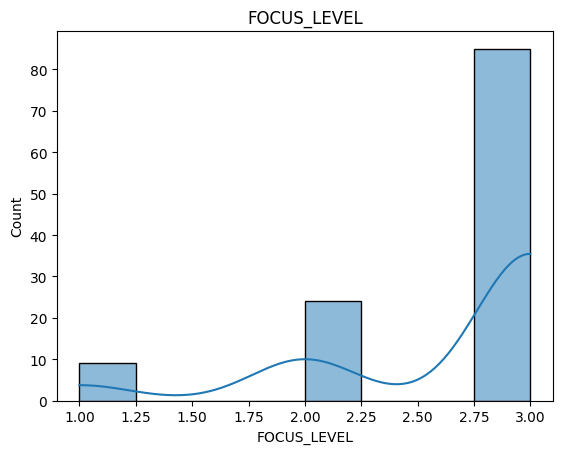

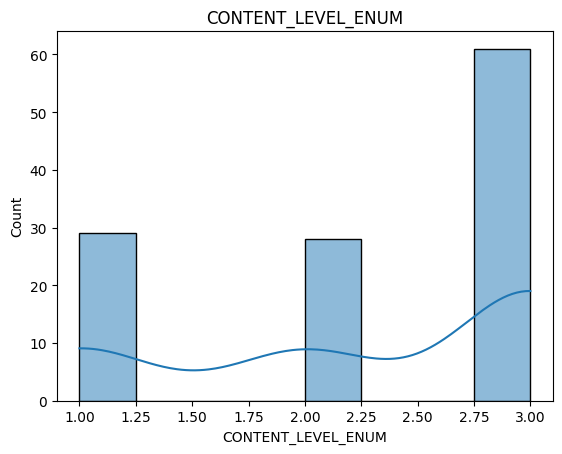

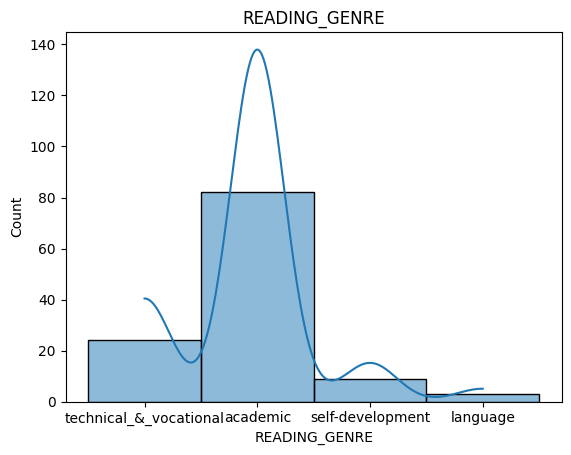

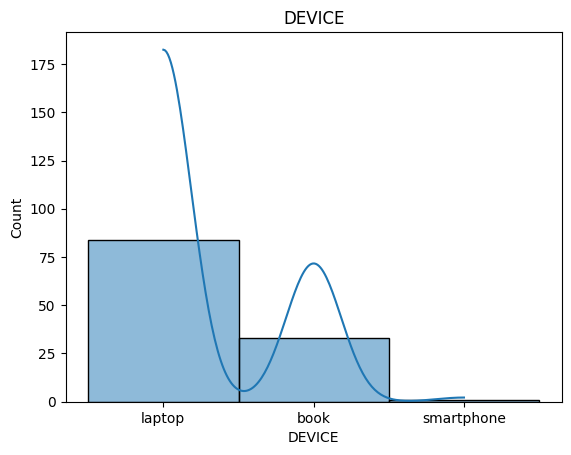

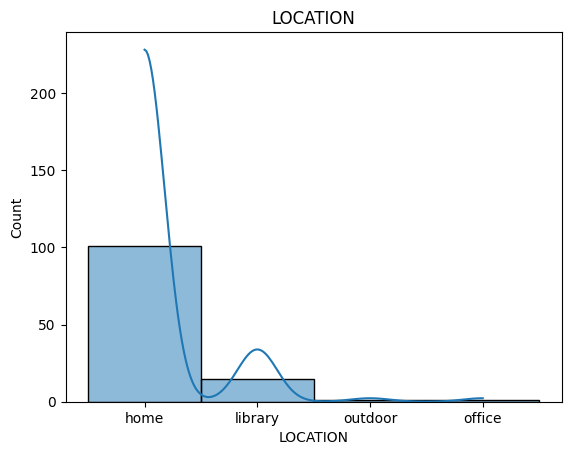

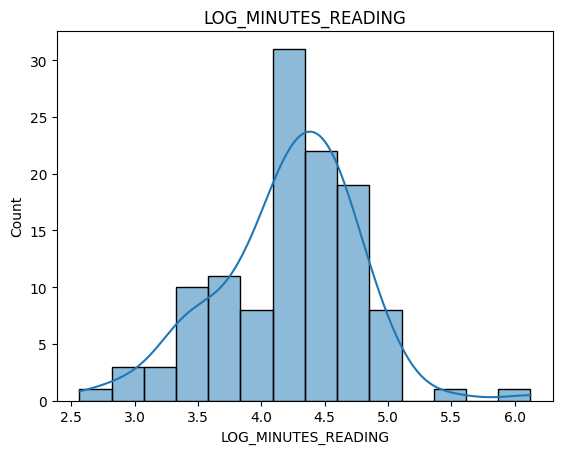

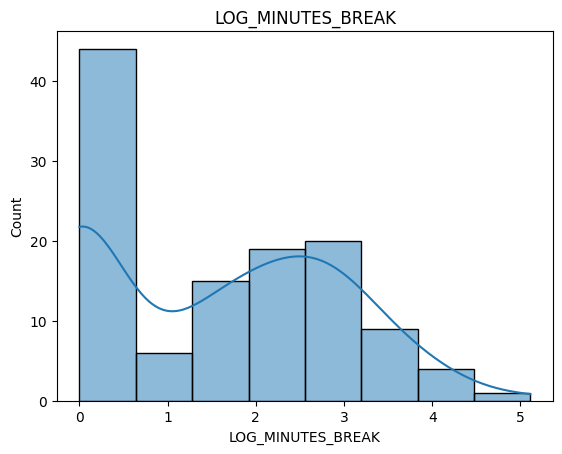

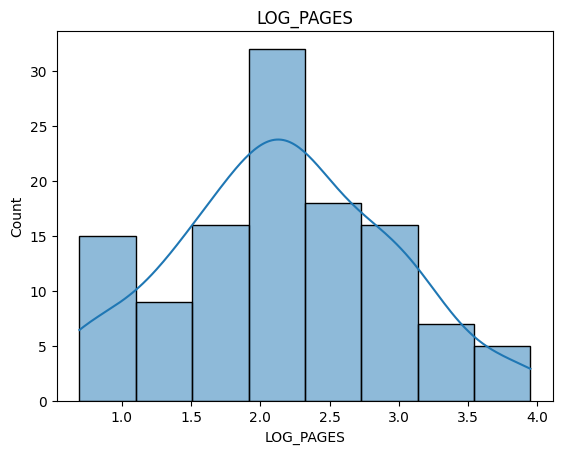

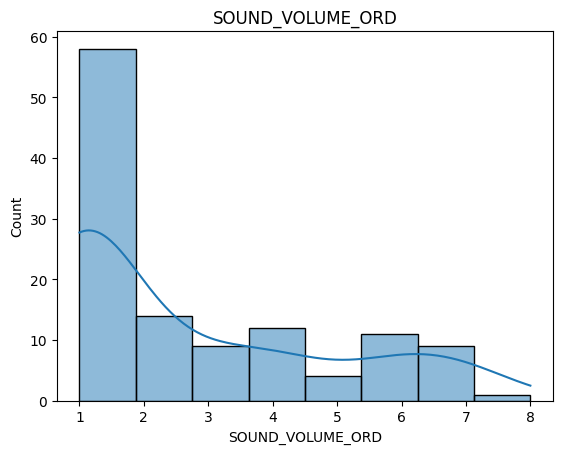

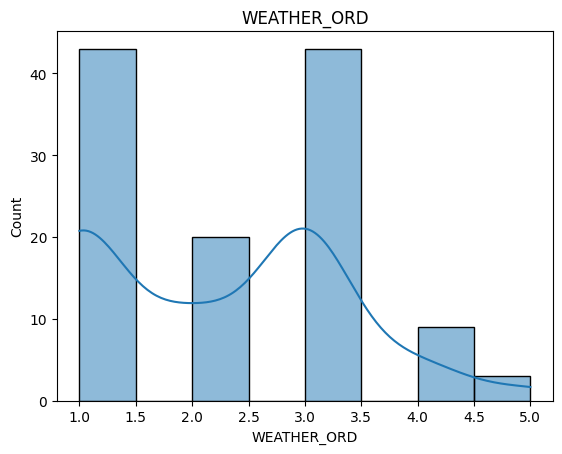

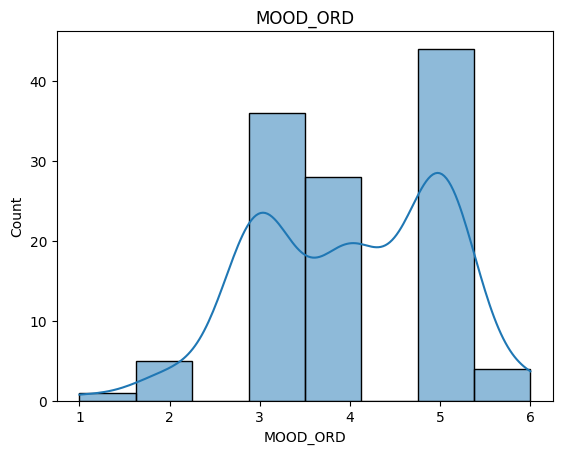

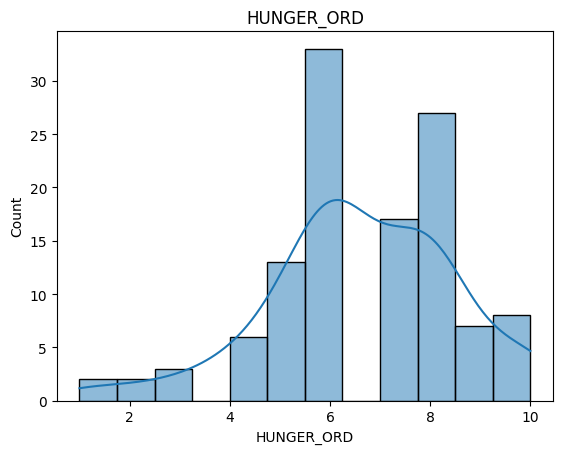

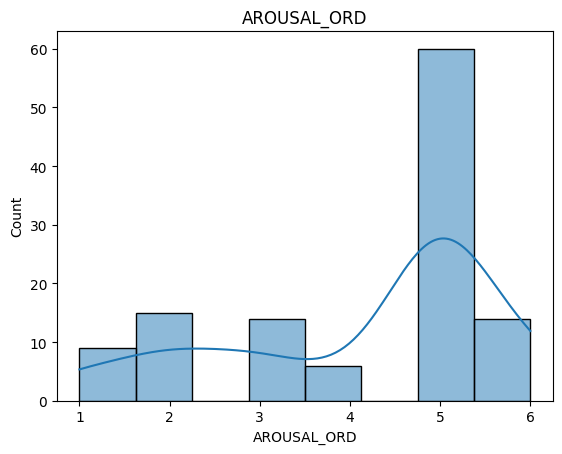

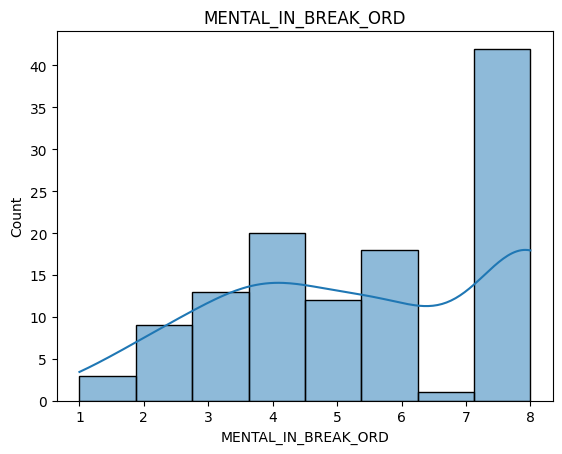

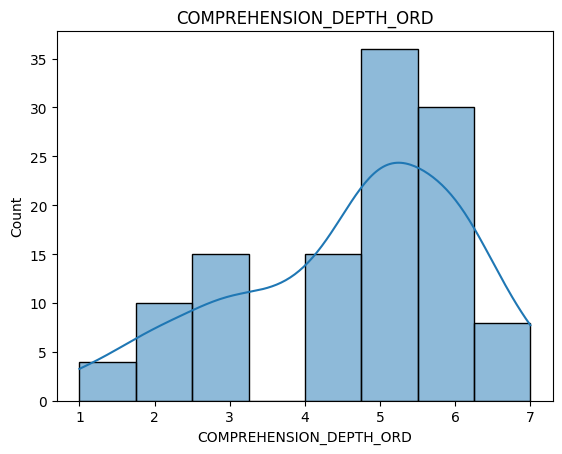

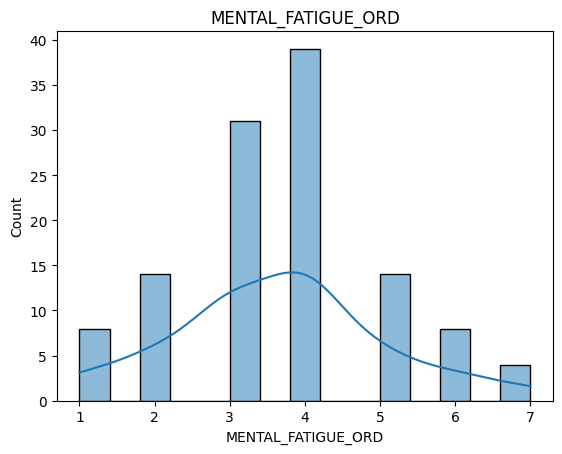

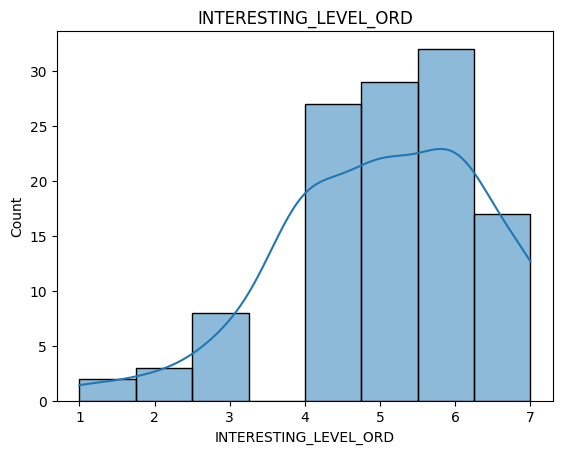

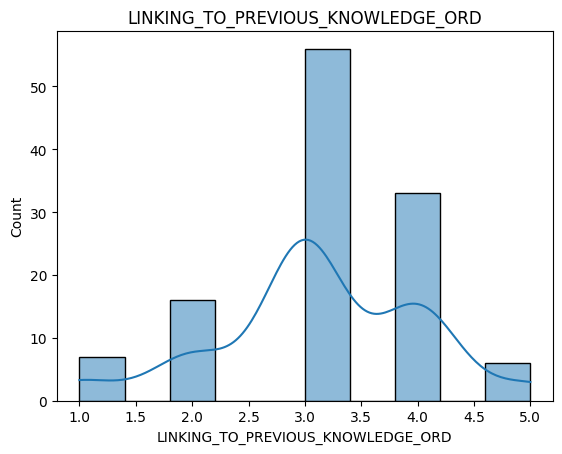

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols_1 = [
    'FOCUS_LEVEL', 'CONTENT_LEVEL_ENUM',
       'READING_GENRE', 'DEVICE', 'LOCATION', 'LOG_MINUTES_READING',
       'LOG_MINUTES_BREAK', 'LOG_PAGES','SOUND_VOLUME_ORD', 'WEATHER_ORD', 'MOOD_ORD', 'HUNGER_ORD',
       'AROUSAL_ORD', 'MENTAL_IN_BREAK_ORD', 'COMPREHENSION_DEPTH_ORD',
       'MENTAL_FATIGUE_ORD', 'INTERESTING_LEVEL_ORD',
       'LINKING_TO_PREVIOUS_KNOWLEDGE_ORD']

for col in num_cols_1:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


#**The draw the correlation**

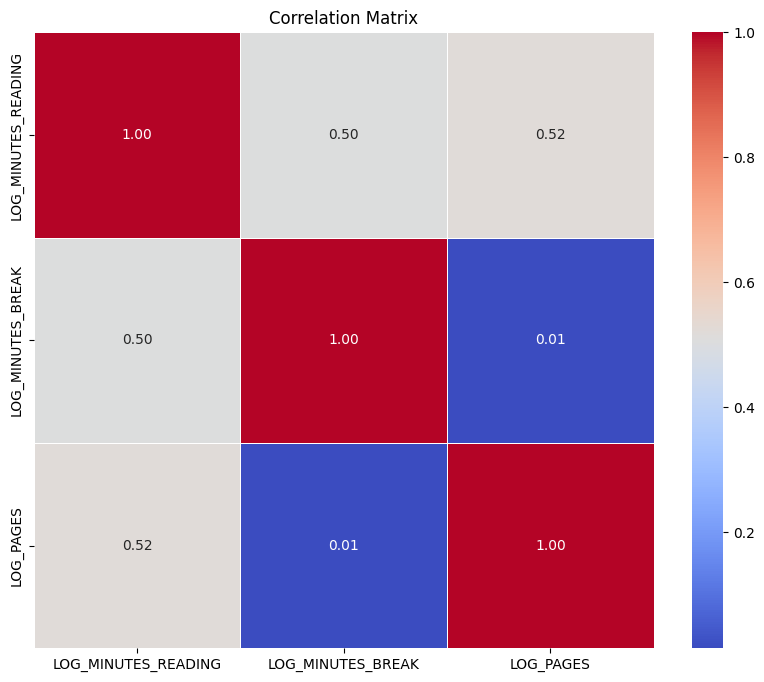

In [217]:

corr_matrix_float = df.select_dtypes(include=['float']).corr()

# Vẽ Heatmap cho đẹp
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_float, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- LOG_MINUTES_READING shows a moderate positive correlation with LOG_MINUTES_BREAK (≈ 0.50) and LOG_PAGES (≈ 0.52), indicating that longer reading sessions tend to be associated with more breaks and more pages read.

- LOG_MINUTES_BREAK and LOG_PAGES are almost uncorrelated (≈ 0.01), suggesting that break duration does not meaningfully relate to reading output (pages).


*Overall, there is no severe multicollinearity, and the variables capture distinct aspects of reading behavior, making them suitable for inclusion in the same model.*

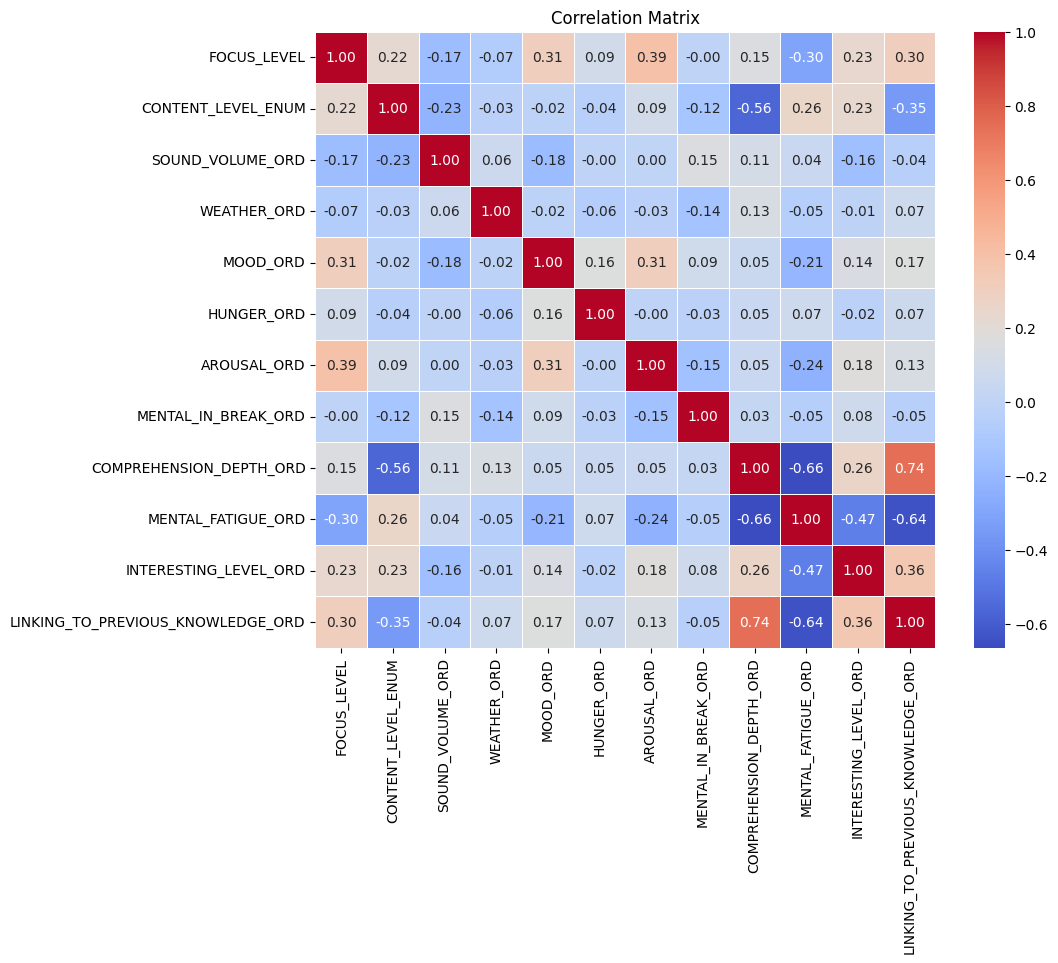

In [218]:
# Tính ma trận tương quan chỉ cho các cột số
corr_matrix_int= df.select_dtypes(include=['int']).corr()

# Vẽ Heatmap cho đẹp
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_int, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

***Red (Positive Correlation)***: Variables increase together.

Strongest link: COMPREHENSION_DEPTH and LINKING_TO_PREVIOUS_KNOWLEDGE (0.74).

Meaning: Connecting new information to what you already know significantly boosts how deeply you understand it.

***Blue (Negative Correlation):*** As one variable increases, the other decreases.

Strongest link: MENTAL_FATIGUE has a strong negative impact on COMPREHENSION_DEPTH (-0.66) and LINKING_TO_PREVIOUS_KNOWLEDGE (-0.64).

Meaning: The more tired your brain is, the harder it is to understand the material or connect dots.

***Pale/White (No Correlation)***: Little to no relationship.

 HUNGER_ORD (Hunger level) has very weak correlations (values near 0), meaning it doesn't significantly impact the other tracked metrics in this dataset.

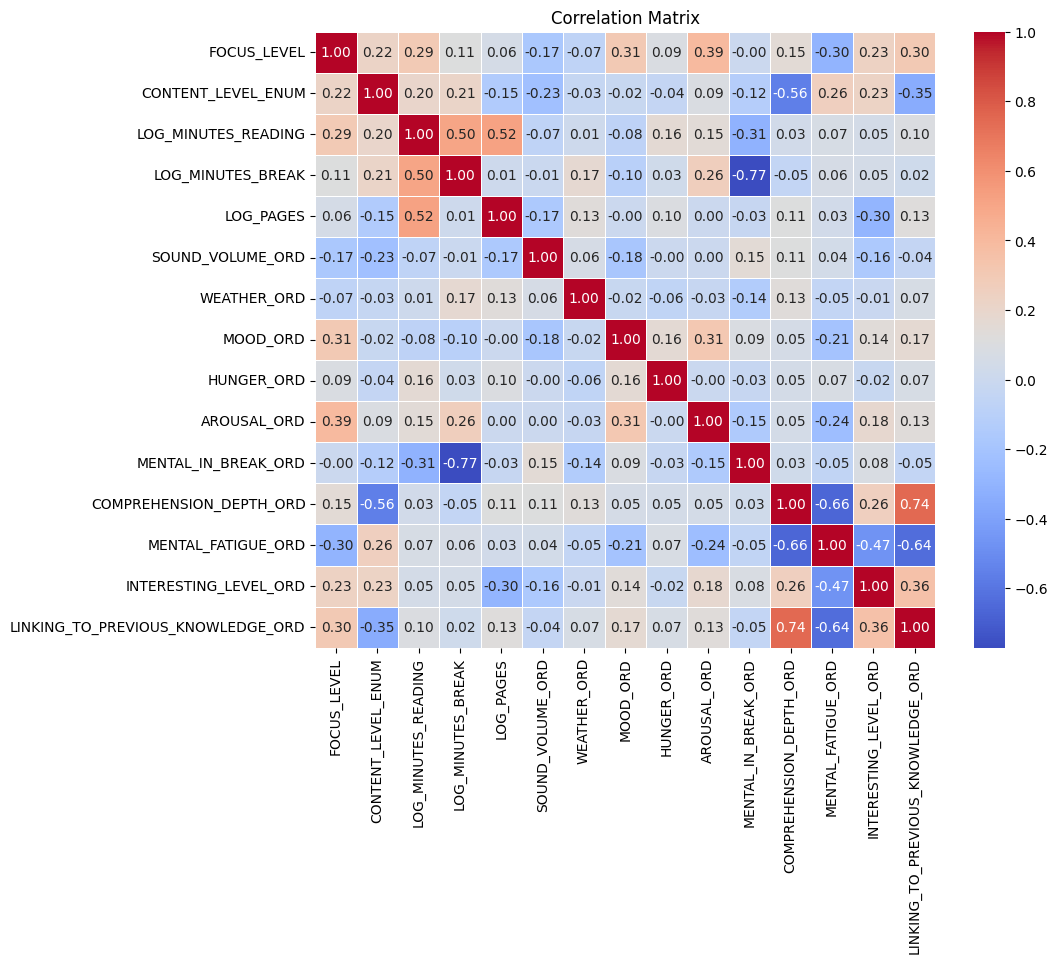

In [219]:
ALL= df.select_dtypes(include=['int','float']).corr()

# Vẽ Heatmap cho đẹp
plt.figure(figsize=(10, 8))
sns.heatmap(ALL, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#**DATA UNDERSTANDING**

In [220]:
df.columns

Index(['AGE_CATEGORY', 'GENDER', 'MAJOR', 'FOCUS_LEVEL', 'CONTENT_LEVEL_ENUM',
       'READING_GENRE', 'DEVICE', 'LOCATION', 'LOG_MINUTES_READING',
       'LOG_MINUTES_BREAK', 'LOG_PAGES', 'SOUND_VOLUME_ORD', 'WEATHER_ORD',
       'MOOD_ORD', 'HUNGER_ORD', 'AROUSAL_ORD', 'MENTAL_IN_BREAK_ORD',
       'COMPREHENSION_DEPTH_ORD', 'MENTAL_FATIGUE_ORD',
       'INTERESTING_LEVEL_ORD', 'LINKING_TO_PREVIOUS_KNOWLEDGE_ORD'],
      dtype='object')

Create a new variable to contain ordinal values.

In [221]:
ord_columns = [col for col in df.columns if 'ORD' in col]
ord_columns

['SOUND_VOLUME_ORD',
 'WEATHER_ORD',
 'MOOD_ORD',
 'HUNGER_ORD',
 'AROUSAL_ORD',
 'MENTAL_IN_BREAK_ORD',
 'COMPREHENSION_DEPTH_ORD',
 'MENTAL_FATIGUE_ORD',
 'INTERESTING_LEVEL_ORD',
 'LINKING_TO_PREVIOUS_KNOWLEDGE_ORD']

In [222]:
ordinal_cols = ord_columns + ['FOCUS_LEVEL', 'CONTENT_LEVEL_ENUM']
ordinal_cols

['SOUND_VOLUME_ORD',
 'WEATHER_ORD',
 'MOOD_ORD',
 'HUNGER_ORD',
 'AROUSAL_ORD',
 'MENTAL_IN_BREAK_ORD',
 'COMPREHENSION_DEPTH_ORD',
 'MENTAL_FATIGUE_ORD',
 'INTERESTING_LEVEL_ORD',
 'LINKING_TO_PREVIOUS_KNOWLEDGE_ORD',
 'FOCUS_LEVEL',
 'CONTENT_LEVEL_ENUM']

In [223]:
# convert into dataframe
ordinal_df = df[ordinal_cols]
ordinal_df

,SOUND_VOLUME_ORD,WEATHER_ORD,MOOD_ORD,HUNGER_ORD,AROUSAL_ORD,MENTAL_IN_BREAK_ORD,COMPREHENSION_DEPTH_ORD,MENTAL_FATIGUE_ORD,INTERESTING_LEVEL_ORD,LINKING_TO_PREVIOUS_KNOWLEDGE_ORD,FOCUS_LEVEL,CONTENT_LEVEL_ENUM
0,1,1,2,5,2,4,5,5,4,3,2,2
1,1,1,2,5,2,4,3,3,5,3,2,3
2,1,3,2,8,3,2,3,5,4,2,1,2
3,1,1,3,8,5,2,3,4,3,2,3,3
4,1,1,3,6,4,1,3,5,1,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
113,3,1,3,10,3,3,5,3,6,4,3,3
114,1,1,5,6,1,8,1,7,3,1,3,3
115,1,2,5,9,5,2,6,3,5,4,2,1
116,7,1,5,6,5,3,6,2,4,4,3,1


In [224]:
#Objective: to detect out-of-scale values

for col in ordinal_df:
    print(f"\n{col}")
    print("Unique values:", sorted(df[col].dropna().unique()))



SOUND_VOLUME_ORD
Unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]

WEATHER_ORD
Unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

MOOD_ORD
Unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]

HUNGER_ORD
Unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]

AROUSAL_ORD
Unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]

MENTAL_IN_BREAK_ORD
Unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]

COMPREHENSION_DEPTH_ORD
Unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]

MENTAL_FATIGUE_ORD
Unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)

In [226]:
for col in df:
    print(f"\n{col}")
    print(df[col].value_counts(normalize=True).round(3))
# Check for ordinal distribution deviation (overlapping by one level)


AGE_CATEGORY
AGE_CATEGORY
young_adult    1.0
Name: proportion, dtype: float64

GENDER
GENDER
male    1.0
Name: proportion, dtype: float64

MAJOR
MAJOR
student    1.0
Name: proportion, dtype: float64

FOCUS_LEVEL
FOCUS_LEVEL
3    0.720
2    0.203
1    0.076
Name: proportion, dtype: float64

CONTENT_LEVEL_ENUM
CONTENT_LEVEL_ENUM
3    0.517
1    0.246
2    0.237
Name: proportion, dtype: float64

READING_GENRE
READING_GENRE
academic                  0.695
technical_&_vocational    0.203
self-development          0.076
language                  0.025
Name: proportion, dtype: float64

DEVICE
DEVICE
laptop        0.712
book          0.280
smartphone    0.008
Name: proportion, dtype: float64

LOCATION
LOCATION
home       0.856
library    0.127
outdoor    0.008
office     0.008
Name: proportion, dtype: float64

LOG_MINUTES_READING
LOG_MINUTES_READING
4.110874    0.059
4.605170    0.042
4.394449    0.025
4.709530    0.025
4.521789    0.025
            ...  
6.124683    0.008
4.382027    0.008
4



**1. Demographics (Highly Uniform)**

100% are Male, Students, and Young Adults.

Note: The sample lacks diversity, so findings only apply to this specific demographic.

**2. Context & Habits**

Location: Mostly at Home (86%), rarely in libraries (13%).

Device: Laptops (71%) are preferred over physical books (28%).

Material: Primarily Academic (70%) reading.

Environment: Quiet settings preferred (Sound level 1 makes up nearly 50%).

**3. State & Performance**

Focus: Very high (Level 3, the max level, accounts for 72%).

Interest: High (Levels 5-6 are dominant).

Comprehension: Deep (Levels 5-6 make up over 55%).

Fatigue: Moderate (Levels 3-4 are most common).

**4. Key Observations**

Breaks: 37.3% of study sessions had zero break time (Log minutes break = 0).

Hunger: Seems surprisingly high (clustered around levels 6 and 8).


***Conclusion:***  : This data represents high-efficiency study sessions by male students, mostly occurring in quiet home environments. The pattern suggests a "grind" style of studying—high focus and comprehension, but often skipping breaks and enduring hunger.

#check correlation ( each variable )

*Have a positive relationnship more time spending on reading more pages finish (appropricate)*

In [227]:
# CHECK THE APPROPRIATE
df[['LOG_MINUTES_READING', 'LOG_PAGES']].corr()

,LOG_MINUTES_READING,LOG_PAGES
LOG_MINUTES_READING,1.000000,0.519137
LOG_PAGES,0.519137,1.000000


*To find out group of people who spending much time for reading but the pages have not finish ( it take long time to finish a pages )*

In [228]:
df.query("LOG_MINUTES_READING > LOG_MINUTES_READING.quantile(0.9) and LOG_PAGES < LOG_PAGES.quantile(0.1)") \
  [['LOG_MINUTES_READING', 'LOG_PAGES']].head()
  #no one

,LOG_MINUTES_READING,LOG_PAGES


*Check wheter continuous values exits negative values ( which not reasonable for time and pages )*

In [229]:
log_cols = ['LOG_MINUTES_READING', 'LOG_MINUTES_BREAK', 'LOG_PAGES']
df[log_cols].describe()


,LOG_MINUTES_READING,LOG_MINUTES_BREAK,LOG_PAGES
count,118.000000,118.000000,118.000000
mean,4.217540,1.539362,2.162240
std,0.552213,1.379240,0.781499
min,2.564949,0.000000,0.693147
25%,3.901822,0.000000,1.609438
50%,4.269673,1.700599,2.197225
75%,4.564348,2.772589,2.708050
max,6.124683,5.111988,3.951244


In [230]:
(df[log_cols] < 0).sum()
# no negative values exists

,0
LOG_MINUTES_READING,0
LOG_MINUTES_BREAK,0
LOG_PAGES,0


*Check if focus too much causes fatigue.*

In [231]:
df.groupby('FOCUS_LEVEL')['MENTAL_FATIGUE_ORD'].mean()


,MENTAL_FATIGUE_ORD
FOCUS_LEVEL,
1,5.222222
2,3.750000
3,3.458824


In [378]:
df['MENTAL_FATIGUE_ORD'].value_counts()
# 1->7 levels

,count
MENTAL_FATIGUE_ORD,
4,39
3,31
5,14
2,14
1,8
6,8
7,4


*"Approximately 12.7% of all students took place in a state of 'high effort': readers achieved maximum concentration (level 3) despite feeling severely fatigued (level ≥ 5)."*

In [232]:
df.query("FOCUS_LEVEL >= 3 and MENTAL_FATIGUE_ORD >= 5 ").shape[0]


15

In [234]:
round(
    df.query("FOCUS_LEVEL >= 3 and MENTAL_FATIGUE_ORD >= 5").shape[0]
    / len(df)
,3) * 100


12.7

*the correlation of sound volume oder and focus level*

*The higher the volume, the lower the focus.*

In [235]:
df.groupby('SOUND_VOLUME_ORD')['FOCUS_LEVEL'].mean()
# volumne càng cao focus càng giảm

,FOCUS_LEVEL
SOUND_VOLUME_ORD,
1,2.672414
2,2.785714
3,2.777778
4,2.666667
5,3.000000
6,2.454545
7,2.222222
8,2.000000


*check the correlation of COMPREHENSION vs INTERESTING*

"How many students don't find this lesson interesting,
but still understand it very well?" = not much a few students (around 0.2)

In [236]:
df[['COMPREHENSION_DEPTH_ORD', 'INTERESTING_LEVEL_ORD']].corr()


,COMPREHENSION_DEPTH_ORD,INTERESTING_LEVEL_ORD
COMPREHENSION_DEPTH_ORD,1.000000,0.259209
INTERESTING_LEVEL_ORD,0.259209,1.000000


*"Does intense focus automatically lead to deep understanding of the material?"
What does fatigue destroy the most?*

In [237]:
psych_cols = [
    'FOCUS_LEVEL', 'INTERESTING_LEVEL_ORD',
    'COMPREHENSION_DEPTH_ORD', 'MENTAL_FATIGUE_ORD'
]
df[psych_cols].corr()


,FOCUS_LEVEL,INTERESTING_LEVEL_ORD,COMPREHENSION_DEPTH_ORD,MENTAL_FATIGUE_ORD
FOCUS_LEVEL,1.000000,0.233617,0.152903,-0.302689
INTERESTING_LEVEL_ORD,0.233617,1.000000,0.259209,-0.467711
COMPREHENSION_DEPTH_ORD,0.152903,0.259209,1.000000,-0.664704
MENTAL_FATIGUE_ORD,-0.302689,-0.467711,-0.664704,1.000000


**MENTAL_FATIGUE is an important variable.**

- It strongly influences COMPREHENSION (-0.665).

- It has a moderate influence on FOCUS and INTERESTING.FOCUS is slightly related to INTERESTING and COMPREHENSION.

- Both variables should be kept in the model to avoid multicollinearity. No variables are correlated > 0.8 or < -0.8.

*This means: there is not too much overlap, so there is no need to remove variables.*

*The percentage of focusing in man students*

In [238]:
df['FOCUS_LEVEL'].value_counts(normalize=True)


,proportion
FOCUS_LEVEL,
3,0.720339
2,0.203390
1,0.076271


 Predict FOCUS_LEVEL from:

-SOUND_VOLUME

-CONTENT_LEVEL_ENUM

-MINUTES_BREAK

-READING_GENRE?

What is the most important factor determining reading effectiveness?

“For person A, they should read genre X, difficulty level Y, and environment Z”

In [240]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report


**1. Feature set (hợp lý – không leakage)**

In [241]:
features = [
    "CONTENT_LEVEL_ENUM",
    "READING_GENRE",
    "SOUND_VOLUME_ORD",
    "LOG_MINUTES_BREAK",
    "LOG_MINUTES_READING",
    "INTERESTING_LEVEL_ORD",
    "MENTAL_FATIGUE_ORD"
]

target = "FOCUS_LEVEL"

df_model = df[features + [target]].dropna()


**2. Encode categorical**

In [242]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = ["READING_GENRE"]
num_cols = [c for c in features if c not in cat_cols]

encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

df_model[cat_cols] = encoder.fit_transform(df_model[cat_cols])


**III. Train model (CatBoost – phù hợp ordinal & nonlinear)**

In [243]:
# !pip install catboost
from catboost import CatBoostClassifier

In [244]:


X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function="MultiClass",
    verbose=0
)

model.fit(X_train, y_train)


In [245]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         5
           3       0.70      0.94      0.80        17

    accuracy                           0.67        24
   macro avg       0.23      0.31      0.27        24
weighted avg       0.49      0.67      0.57        24



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


IV. Yếu tố nào quan trọng nhất? (SHAP)

In [246]:
import shap


In [247]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)


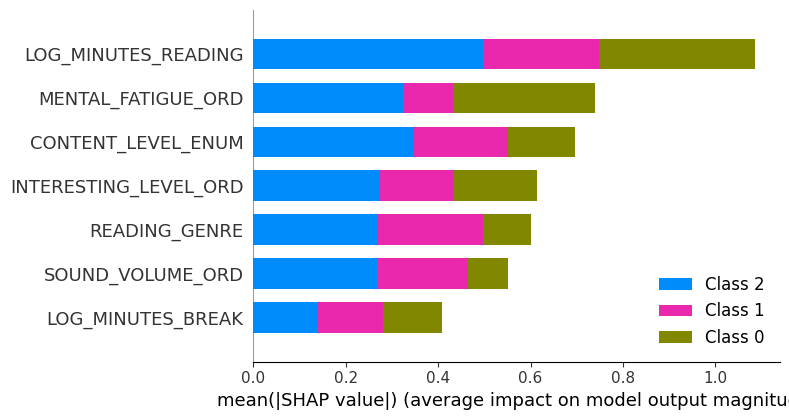

In [248]:
shap.summary_plot(
    shap_values,
    X_train,
    plot_type="bar",
    max_display=10
)


V. Recommendation: “Với người A, nên đọc gì – ở đâu – như thế nào?

In [249]:
def predict_focus(profile: dict):
    row = pd.DataFrame([profile])
    row[cat_cols] = encoder.transform(row[cat_cols])
    return model.predict(row)[0]


In [250]:
def recommend_reading(base_profile):
    results = []

    for genre in df["READING_GENRE"].unique():
        for content_level in sorted(df["CONTENT_LEVEL_ENUM"].unique()):
            for sound in sorted(df["SOUND_VOLUME_ORD"].unique()):

                profile = base_profile.copy()
                profile.update({
                    "READING_GENRE": genre,
                    "CONTENT_LEVEL_ENUM": content_level,
                    "SOUND_VOLUME_ORD": sound
                })

                focus = predict_focus(profile)

                results.append({
                    "READING_GENRE": genre,
                    "CONTENT_LEVEL_ENUM": content_level,
                    "SOUND_VOLUME_ORD": sound,
                    "PRED_FOCUS": focus
                })

    return pd.DataFrame(results).sort_values("PRED_FOCUS", ascending=False)


TẠO user_profile (bắt buộc)

In [251]:
import numpy as np

user_profile = {
    "INTERESTING_LEVEL_ORD": 3,
    "MENTAL_FATIGUE_ORD": 4,
    "LOG_MINUTES_BREAK": np.log1p(8),
    "LOG_MINUTES_READING": np.log1p(45),

    # 3 biến này sẽ được thay khi recommend
    "READING_GENRE": "dummy",
    "CONTENT_LEVEL_ENUM": 2,
    "SOUND_VOLUME_ORD": 2
}


In [252]:
rec = recommend_reading(user_profile)
rec.head(5)


,READING_GENRE,CONTENT_LEVEL_ENUM,SOUND_VOLUME_ORD,PRED_FOCUS
0,technical_&_vocational,1,1,[3]
1,technical_&_vocational,1,2,[3]
70,self-development,3,7,[3]
69,self-development,3,6,[3]
68,self-development,3,5,[3]


Hiện tại, bạn có thể đọc nội dung kỹ thuật hoặc phát triển bản thân ở mức độ dễ–trung bình. Dù đọc trong môi trường yên tĩnh hay có nhạc nhẹ, mức tập trung dự đoán vẫn ổn định.

Đọc nội dung dễ – trung bình

Thể loại:

kỹ thuật / nghề nghiệp hoặc

phát triển bản thân

Âm thanh:

yên tĩnh hoặc

có nhạc nhẹ
→ đều đạt mức tập trung 3

Kết quả này KHÔNG nói:

“Âm thanh 1 tốt hơn âm thanh 7”

Mà nói:

“Trong trạng thái này,
âm thanh không còn là yếu tố quyết định nữa.”

Thứ quyết định chính là:

độ khó nội dung

thể loại phù hợp

1. Nếu buộc chỉ chọn 1 biến để cải thiện hiệu quả đọc → chọn biến nào? Vì sao?

Tôi sẽ chọn độ khó nội dung, vì đây là biến có thể can thiệp trực tiếp, tác động mạnh đến mức tập trung và có hiệu ứng phi tuyến rõ ràng. Nội dung quá khó gây quá tải nhận thức, trong khi nội dung quá dễ làm giảm sự tham gia nhận thức, cả hai đều làm giảm hiệu quả đọc.

In [253]:
df.groupby("CONTENT_LEVEL_ENUM")["FOCUS_LEVEL"].mean()


,FOCUS_LEVEL
CONTENT_LEVEL_ENUM,
1,2.482759
2,2.500000
3,2.786885


In [254]:
df.groupby("CONTENT_LEVEL_ENUM")["FOCUS_LEVEL"].std()


,FOCUS_LEVEL
CONTENT_LEVEL_ENUM,
1,0.687682
2,0.745356
3,0.486989


*Prove bằng model (feature importance)*

In [255]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,LOG_MINUTES_READING,24.219979
1,CONTENT_LEVEL_ENUM,13.528062
2,LOG_MINUTES_BREAK,13.384185
3,MENTAL_FATIGUE_ORD,13.036243
4,INTERESTING_LEVEL_ORD,12.418391
5,SOUND_VOLUME_ORD,12.328429
6,READING_GENRE,11.084712


Mặc dù LOG_MINUTES_READING có importance cao nhất, tôi không chọn biến này vì nó mang tính hành vi kết quả, không phải đòn bẩy can thiệp trực tiếp.
Trong các biến có thể can thiệp, CONTENT_LEVEL_ENUM là lựa chọn hợp lý nhất vì có mức ảnh hưởng cao và dễ điều chỉnh.